# Assignment - 14  Decision Trees (Fraud check)

## Import Necessary Data

In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
income = pd.read_csv(r'D:\Downloads\Fraud_check.csv')
income

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Data Understanding

In [3]:
income.shape

(600, 6)

In [4]:
income.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
income.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

## Data Preparation

#### according to the given question  taxable income <= 30000 as Risky and less then 30000  is  'Good'

In [6]:
income.loc[income['Taxable.Income'] <=30000,'Income']= 'Risk'
income.loc[income['Taxable.Income'] >30000,'Income']= 'Good'

In [7]:
income

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [8]:
income1 = income.drop('Taxable.Income' ,axis=1)

In [9]:
income1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [10]:
income1['Income'].value_counts()

Good    476
Risk    124
Name: Income, dtype: int64

In [11]:
le = LabelEncoder()
income1['Undergrad'] = le.fit_transform(income1['Undergrad'])
income1['Marital.Status'] = le.fit_transform(income1['Marital.Status'])
income1['Urban'] = le.fit_transform(income1['Urban'])
income1['Income'] = le.fit_transform(income1['Income'])

In [12]:
income1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


## Model Building

In [13]:
x = income1.drop('Income' , axis=1)
y = income1[['Income']]

In [14]:
x.shape , y.shape

((600, 5), (600, 1))

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.20 , random_state=12 , shuffle= True)

In [16]:
x_train.shape , y_train.shape

((480, 5), (480, 1))

In [17]:
x_test.shape , y_test.shape

((120, 5), (120, 1))

<AxesSubplot:xlabel='Income', ylabel='count'>

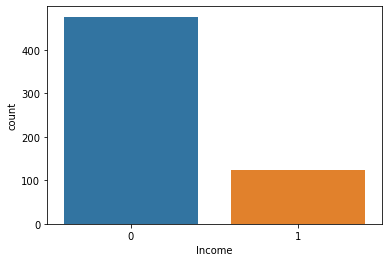

In [19]:
sns.countplot(x='Income',  data=y)

<AxesSubplot:xlabel='Undergrad', ylabel='count'>

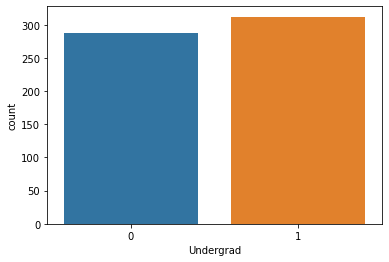

In [24]:
sns.countplot(income1.Undergrad)

## Model Training

In [25]:
decisiontree = DecisionTreeClassifier(criterion='gini' , max_depth=3)

In [26]:
decisiontree.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3)

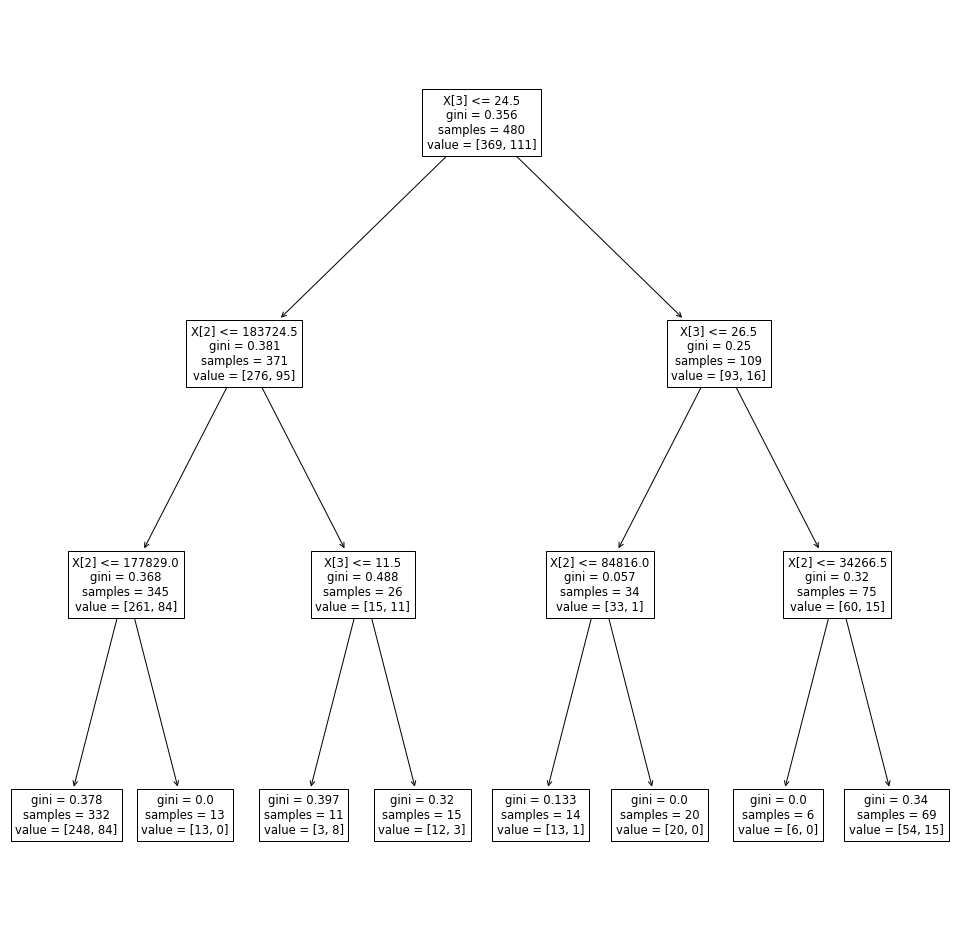

In [27]:
plt.figure(figsize=(17,17))
plot_tree(decision_tree=decisiontree)
plt.show()

In [28]:
decisiontree.feature_importances_

array([0.        , 0.        , 0.35308156, 0.64691844, 0.        ])

## Model Testing // Model Evaluation

In [29]:
y_pred = decisiontree.predict(x_test)

In [30]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
y_pred.shape

(120,)

In [32]:
pd.Series(y_pred).value_counts()

0    115
1      5
dtype: int64

In [33]:
y_pred=y_pred.reshape(120,1) 

In [34]:
accuracy_score(y_test,y_pred)

0.85

In [35]:
confusion_matrix(y_test,y_pred)

array([[102,   5],
       [ 13,   0]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       107
           1       0.00      0.00      0.00        13

    accuracy                           0.85       120
   macro avg       0.44      0.48      0.46       120
weighted avg       0.79      0.85      0.82       120



In [37]:
np.mean(y_pred==y_test)

Income    0.85
dtype: float64